In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
import math
import torch

ModuleNotFoundError: No module named 'torch'

In [2]:
beat_time = pd.read_csv('./csvs/M06-1beat_time.csv')

In [3]:
x = np.array(beat_time['pid1263-01'])

In [ ]:
ac = np.correlate(y, y, mode="same")

plt.plot(np.arange(len(ac)), ac)

In [20]:
y.shape

(4784554,)

In [21]:
widmung = "./phrasing/recordings/widmung/3.mp3"
y, sr = librosa.load(widmung)
onset_env = librosa.onset.onset_strength(y)

/Users/jrmylee/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [22]:
onset_env.shape

(10273,)

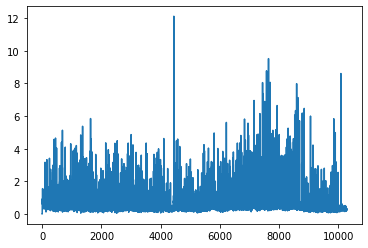

In [23]:
plt.plot(np.arange(len(onset_env)), onset_env)

In [14]:
librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

array([135.99917763])

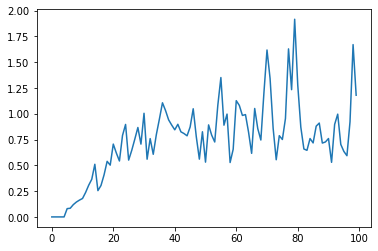

In [9]:
plt.plot(np.arange(100), onset_env[0:100])

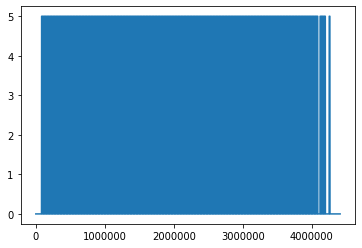

In [4]:
import math
# sample rate is 22050
sr = 22050
length = 200 * 22050 # length in samples
x_transformed = np.zeros(length) #200 seconds
delta = math.floor(.25 * 22050)

for a in x:
    sample_num = math.floor(a) * sr
    top, bottom = min(length, sample_num + delta), max(0, sample_num - delta)
    for i in range(bottom, top):
        x_transformed[i] = 5

plt.plot(np.arange(len(x_transformed)), x_transformed)

In [8]:
first_ten = librosa.beat.tempo(onset_envelope=x_transformed[0: 10 * 22050], sr=sr, aggregate=None)

In [10]:
len(first_ten)

220500

In [49]:
""" Estimate causal tempo from list of beat times at certain point in time
Parameters 
----------
beat_times : np.ndarray [shape=(n,)]
    array of beat times

time : number > 0
    point in time to extract tempo
    
sr : number > 0
    sampling rate
"""
def tempo(beat_times, sr=22050):
    x_transformed = np.zeros(math.ceil(beat_times[len(beat_times) - 1]) + 1) #200 seconds
    print(beat_times)
    for a in beat_times:
        sample_num = math.floor(a)
        x_transformed[sample_num] = 1
    print(x_transformed)
    tempo = librosa.beat.tempo(onset_envelope=x_transformed, sr=sr, aggregate=None)
    return tempo

In [50]:
tempo(x, 100)

[  4.4350113   5.13161     5.8930839   6.3661451   7.0102268   7.5036961
   8.1555329   8.6053515   9.0554649   9.5024717  10.015125   10.460023
  11.035125   11.672676   12.217574   12.788186   13.314308   13.714717
  14.368798   14.823288   15.283832   15.82737    16.494717   16.923696
  17.800454   18.752971   19.562971   20.136848   20.877007   21.559048
  22.084014   22.48449    22.939615   23.475125   23.901655   24.321905
  24.986961   25.779615   26.468594   26.966961   27.640839   28.215533
  28.802063   29.578707   30.506961   31.191655   32.030635   32.852268
  33.821247   34.649932   35.342358   35.855125   36.512676   37.110635
  37.654717   38.056916   38.502449   38.952676   39.324399   39.881723
  40.35424    40.937166   41.425737   41.947778   42.554467   42.974308
  43.524512   44.02737    44.463288   44.988594   45.673583   46.162676
  46.836757   47.952676   48.768707   49.285737   50.157052   50.641655
  51.168186   51.525329   51.96263    52.40381    52.871859   5

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, in